<a href="https://colab.research.google.com/github/tamandakaunda-15/Time_Series_Forecasting2025/blob/main/air_quality_forecasting_starter_code_TamandaKaunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [ ]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [ ]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [ ]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [ ]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30676 entries, 2010-01-01 00:00:00 to 2013-07-02 03:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       30676 non-null  int64  
 1   DEWP     30676 non-null  float64
 2   TEMP     30676 non-null  float64
 3   PRES     30676 non-null  float64
 4   Iws      30676 non-null  float64
 5   Is       30676 non-null  float64
 6   Ir       30676 non-null  float64
 7   cbwd_NW  30676 non-null  float64
 8   cbwd_SE  30676 non-null  float64
 9   cbwd_cv  30676 non-null  float64
 10  pm2.5    28755 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB

Training Data Stats below:
                 No          DEWP          TEMP          PRES           Iws  \
count  30676.000000  30676.000000  30676.000000  30676.000000  30676.000000   
mean   15338.500000     -0.029431     -0.062712      0.013612      0.030542   
std     8855.54276

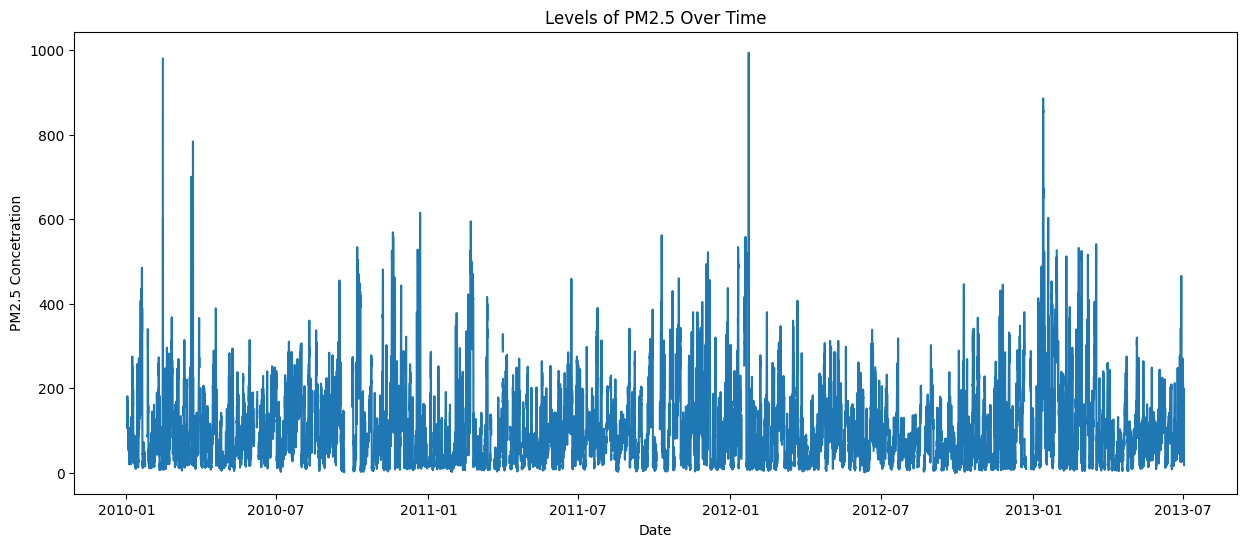

In [ ]:
#To check for Data types & non-null counts
print("\nTraining Data Information:")
train.info()

# Statistical summary of the numerical columns in the dataset
print("\nTraining Data Stats below:")
print(train.describe())


# Data visualization with Matplotlib
plt.figure(figsize=(15,6))
plt.plot(train['pm2.5'])
plt.title("Levels of PM2.5 Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concetration")
plt.show()

#To check for stationarity

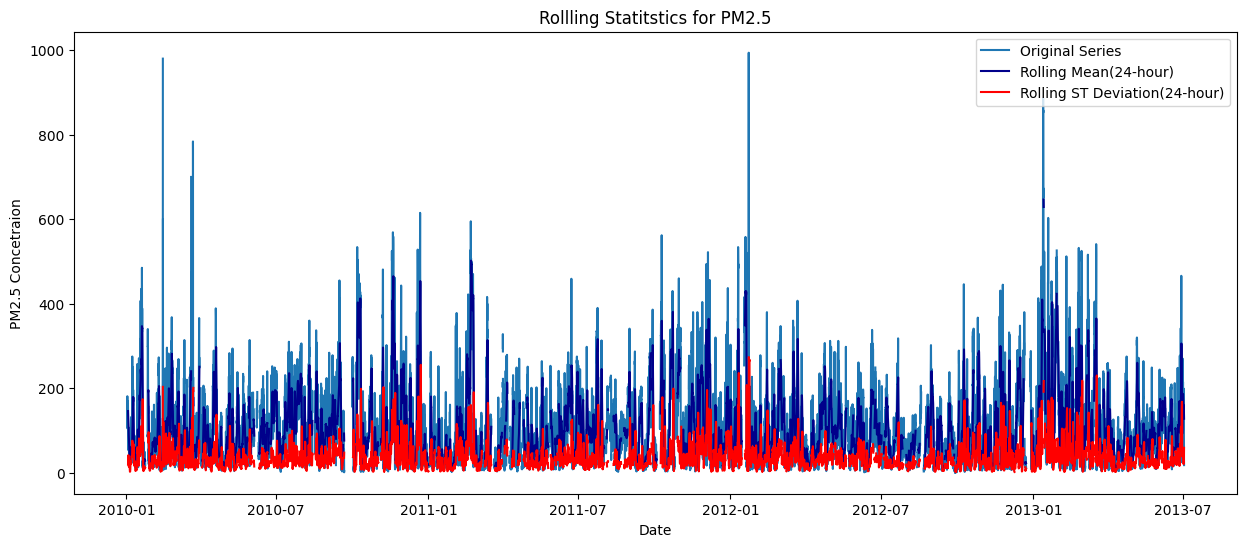

In [ ]:
#Calculate rolling statistics to check for stationarity
# (to check whether PM2.5 levels are constant over a period of time or they change)
rolling_mean = train['pm2.5'].rolling(window=24).mean()
rolling_std = train['pm2.5'].rolling(window=24).std()


# A plot of the original series VS the rolling stats(Our data is non-stationary,
# meaning the pm2.5 levels is not constant and varies throughout the period)
#as indicated by the varying means and standard deviations throughout the time
#period
plt.figure(figsize=(15,6))
plt.plot(train['pm2.5'], label="Original Series")
plt.plot(rolling_mean, color='darkblue', label="Rolling Mean(24-hour)")
plt.plot(rolling_std, color='red', label="Rolling ST Deviation(24-hour)")
plt.title("Rollling Statitstics for PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concetraion")
plt.legend()
plt.show()




# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [ ]:
# Check the number of missing values innthe train dataset
print("Missing values in train dataset before foward fill:")
print(train["pm2.5"].isnull().sum())


# forward fill to fill the 1921 missing values in this dataset
train['pm2.5'].ffill(inplace=True)

# backward fill bfill() to fill remaining values at the begginin g of the series
train['pm2.5'].bfill(inplace=True)

# check the number of missing values again to confirm
print("/nMissing values after filling:")
print(train["pm2.5"].isnull().sum())

Missing values in train dataset before foward fill:
1921
/nMissing values after filling:
0


/tmp/ipython-input-3963640049.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['pm2.5'].ffill(inplace=True)
/tmp/ipython-input-3963640049.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [ ]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

# Exclude 'pm2.5', 'No', and the problematic 'datetime'
feature_cols = [col for col in train.columns if col not in ['pm2.5', 'No', 'datetime']]

# 2. Split features and target from the training data
X_train = train[feature_cols]
y_train = train['pm2.5']

# 3. Prepare the test data with the same features
# This ensures consistency with the training data
X_test_raw = test[feature_cols]

In [67]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Instantiate the feature and target scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale features and target separately
X_scaled = scaler_X.fit_transform(X_train)
y_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))

# Define sequence parameters - Assuming these were defined earlier
n_steps_in = 24
n_steps_out = 1

# Define the create_sequences function - Assuming this was defined earlier
def create_sequences(data, n_steps_in, n_steps_out):
    """
    This code block splits a univariate time series into sequences of input and output

     Args:

        data(np.array) : The time series data to be split (train dataset)
        n_steps_int(int) : # of time steps in the input sequence
        n_steps_out(int) : # of time steps in the output sequence ( the prediction window)

     Returns:
         tuple: (input_sequences, output_sequences) or (input_sequences, None) for test data
     """

    X, y = [], []
    is_train = data.shape[1] > X_train.shape[1] # Check if target variable is included
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(data):
            break
        # gather input and output parts of the pattern
        if is_train:
            seq_x, seq_y = data[i:end_ix, :-1], data[end_ix:out_end_ix, -1] # Separate features and target
            y.append(seq_y)
        else:
            seq_x = data[i:end_ix, :] # Only features for test data
        X.append(seq_x)

    if is_train:
        return np.array(X), np.array(y)
    else:
        return np.array(X), None


# Combine scaled features and target
scaled_data = np.hstack((X_scaled, y_scaled))

# Create sequences for training
X_seq, y_seq = create_sequences(scaled_data, n_steps_in, n_steps_out)

# Select the pm2.5 column from the y sequences (the last one)
# y_seq = y_seq[:, :, -1] # This is handled in the updated create_sequences function

# Reshape y_seq to remove the extra dimension
y_seq = y_seq.reshape(-1, 1)

In [ ]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
#X_train = np.expand_dims(X_train, axis=1)- Data was reshaped in the previous code

In [ ]:
def create_sequences_separate(X_data, y_data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(X_data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(y_data):
            break
        seq_x, seq_y = X_data[i:end_ix], y_data[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences_separate(X_scaled, y_scaled, n_steps_in, n_steps_out)

In [ ]:
# Splitting the sequences into training and validation sets
split = int(0.8 * len(X_seq))
X_train_seq, y_train_seq = X_seq[:split], y_seq[:split]
X_val_seq, y_val_seq = X_seq[split:], y_seq[split:]

print(f"shape of X_train_seq: {X_train_seq.shape}")
print(f"shape of y_train_seq: {y_train_seq.shape}")
print(f"shape of X_val_seq: {X_val_seq.shape}")
print(f"shape of y_val_seq: {y_val_seq.shape}")


shape of X_train_seq: (24521, 24, 9)
shape of y_train_seq: (24521, 1, 1)
shape of X_val_seq: (6131, 24, 9)
shape of y_val_seq: (6131, 1, 1)


# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def run_experiment(n_units, epochs, batch_size, learning_rate, model_name):
    """
    Builds, trains, and evaluates an LSTM model for a single experiment.

    Args:
        n_units (int): Number of units in the LSTM layer.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        learning_rate (float): Learning rate for the Adam optimizer.
        model_name (str): A name for the current experiment.
    """
    # 1. Define the model
    model = Sequential([
        LSTM(n_units, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dense(1)
    ])

    # 2. Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]
    )

    # 3. Train the model
    print(f"--- Starting training for: {model_name} ---")
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_seq, y_val_seq),
        verbose=1
    )

    # 4. Evaluate the model on validation data
    val_predictions = model.predict(X_val_seq, verbose=0)
    val_predictions_unscaled = scaler_y.inverse_transform(val_predictions)
    # Reshape y_val_seq to 2 dimensions before inverse_transform
    y_val_true = scaler_y.inverse_transform(y_val_seq.reshape(-1, 1))
    val_rmse = sqrt(mean_squared_error(y_val_true.flatten(), val_predictions_unscaled.flatten()))

    print(f" Finished! Final Validation RMSE for '{model_name}': {val_rmse}\n")

    # 5. Plot the loss history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss History for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return val_rmse

--- Starting training for: Baseline Model ---
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 0.1011 - loss: 0.0066 - val_lambda: 0.0819 - val_loss: 0.0070
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - lambda: 0.1020 - loss: 0.0047 - val_lambda: 0.0813 - val_loss: 0.0062
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - lambda: 0.1045 - loss: 0.0045 - val_lambda: 0.0807 - val_loss: 0.0069
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - lambda: 0.1060 - loss: 0.0042 - val_lambda: 0.0821 - val_loss: 0.0060
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - lambda: 0.1073 - loss: 0.0041 - val_lambda: 0.0822 - val_loss: 0.0057
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - lambda: 0.1048 - loss: 0.0037 - val_lambda: 0.0882 - val_loss: 0.0063
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1056 - loss: 0.0038 - val_lambda: 0.0811 - val_loss: 0.0058
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - lambda: 0.1048 - loss: 0.0037 - val_lambda: 0.0850 - val_loss: 0.0059
Epoch 9/1

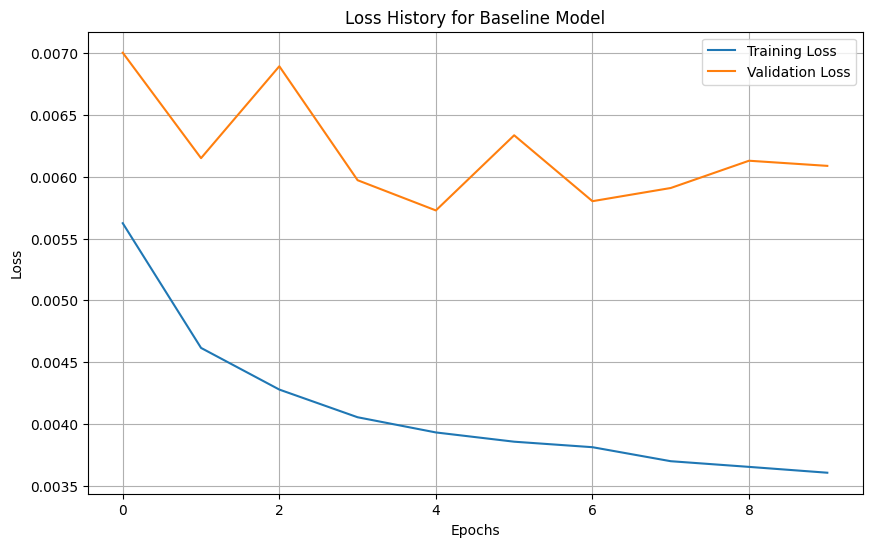

Experiment 1 Baseline RMSE: 77.56102827771903


In [ ]:
# Experiment 1: Baseline
baseline_rmse = run_experiment(n_units=32, epochs=10, batch_size=32, learning_rate=0.001, model_name="Baseline Model")
print(f"Experiment 1 Baseline RMSE: {baseline_rmse}")


--- Starting training for: 64-Unit Model ---
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - lambda: 0.1027 - loss: 0.0064 - val_lambda: 0.0816 - val_loss: 0.0069
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - lambda: 0.1022 - loss: 0.0044 - val_lambda: 0.0825 - val_loss: 0.0064
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - lambda: 0.1045 - loss: 0.0041 - val_lambda: 0.0834 - val_loss: 0.0059
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - lambda: 0.1056 - loss: 0.0039 - val_lambda: 0.0840 - val_loss: 0.0064
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - lambda: 0.1057 - loss: 0.0038 - val_lambda: 0.0852 - val_loss: 0.0065
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - lambda: 0.1049 - loss: 0.0037 - val_lambda: 0.0847 - val_loss: 0.0063
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - lambda: 0.1064 - loss: 0.0036 - val_lambda: 0.0814 - val_loss: 0.0056
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - lambda: 0.1078 - loss: 0.0036 - val_lambda: 0.0806 - val_loss: 0.0055
Epo

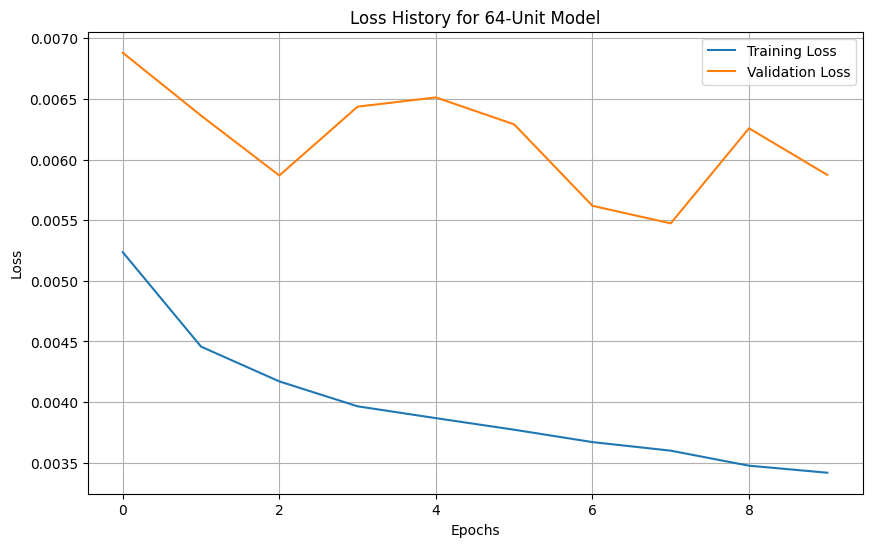

Experiment 2 RMSE: 76.17986330897426


In [ ]:
# Experiment 2: Increase LSTM units
exp2_rmse = run_experiment(n_units=64, epochs=10, batch_size=32, learning_rate=0.001, model_name="64-Unit Model")
print(f"Experiment 2 RMSE: {exp2_rmse}")


--- Starting training for: More Epochs ---
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 0.1050 - loss: 0.0088 - val_lambda: 0.0842 - val_loss: 0.0075
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 0.1046 - loss: 0.0048 - val_lambda: 0.0858 - val_loss: 0.0062
Epoch 3/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1058 - loss: 0.0043 - val_lambda: 0.0848 - val_loss: 0.0061
Epoch 4/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 0.1057 - loss: 0.0042 - val_lambda: 0.0815 - val_loss: 0.0057
Epoch 5/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 0.1041 - loss: 0.0036 - val_lambda: 0.0799 - val_loss: 0.0062
Epoch 6/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1056 - loss: 0.0036 - val_lambda: 0.0815 - val_loss: 0.0055
Epoch 7/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 0.1047 - loss: 0.0035 - val_lambda: 0.0801 - val_loss: 0.0060
Epoch 8/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 0.1062 - loss: 0.0034 - val_lambda: 0.0798 - val_loss: 0.0058
Epoch 9

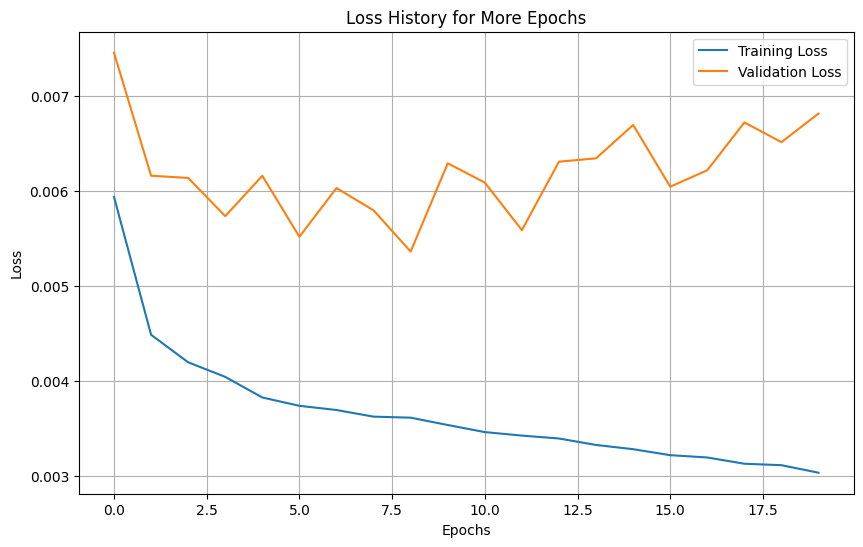

Experiment 3 RMSE: 82.0770012268902


In [ ]:
# Experiment 3: More epochs
exp3_rmse = run_experiment(n_units=32, epochs=20, batch_size=32, learning_rate=0.001, model_name="More Epochs")
print(f"Experiment 3 RMSE: {exp3_rmse}")


--- Starting training for: 10 More Epochs ---
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - lambda: 0.1032 - loss: 0.0063 - val_lambda: 0.0820 - val_loss: 0.0062
Epoch 2/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1039 - loss: 0.0044 - val_lambda: 0.0812 - val_loss: 0.0065
Epoch 3/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 0.1063 - loss: 0.0045 - val_lambda: 0.0803 - val_loss: 0.0058
Epoch 4/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - lambda: 0.1047 - loss: 0.0040 - val_lambda: 0.0831 - val_loss: 0.0060
Epoch 5/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1070 - loss: 0.0040 - val_lambda: 0.0818 - val_loss: 0.0060
Epoch 6/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - lambda: 0.1066 - loss: 0.0038 - val_lambda: 0.0840 - val_loss: 0.0058
Epoch 7/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1062 - loss: 0.0039 - val_lambda: 0.0830 - val_loss: 0.0060
Epoch 8/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1067 - loss: 0.0036 - val_lambda: 0.0803 - val_loss: 0.0062
Epoch 9/

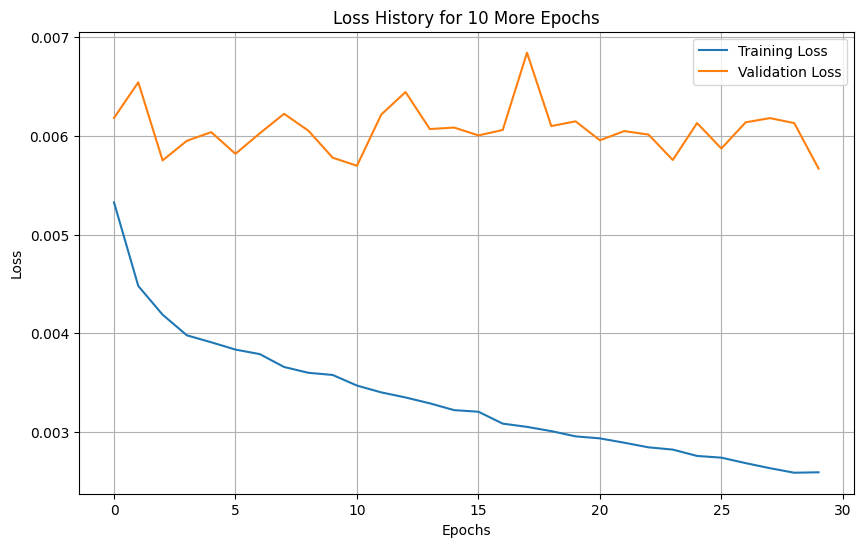

Experiment 4 RMSE: 74.84519162049423


In [ ]:
# Experiment 4: 10 More epochs
exp3_rmse = run_experiment(n_units=32, epochs=30, batch_size=32, learning_rate=0.001, model_name="10 More Epochs")
print(f"Experiment 4 RMSE: {exp3_rmse}")

--- Starting training for: 10 More Epochs ---
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - lambda: 0.1030 - loss: 0.0066 - val_lambda: 0.0840 - val_loss: 0.0065
Epoch 2/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - lambda: 0.1032 - loss: 0.0045 - val_lambda: 0.0820 - val_loss: 0.0059
Epoch 3/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - lambda: 0.1044 - loss: 0.0043 - val_lambda: 0.0860 - val_loss: 0.0062
Epoch 4/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 0.1049 - loss: 0.0041 - val_lambda: 0.0930 - val_loss: 0.0072
Epoch 5/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - lambda: 0.1060 - loss: 0.0039 - val_lambda: 0.0814 - val_loss: 0.0058
Epoch 6/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1065 - loss: 0.0039 - val_lambda: 0.0830 - val_loss: 0.0057
Epoch 7/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - lambda: 0.1070 - loss: 0.0038 - val_lambda: 0.0836 - val_loss: 0.0056
Epoch 8/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - lambda: 0.1072 - loss: 0.0039 - val_lambda: 0.0836 - val_loss: 0.0056
Epoch 9/3

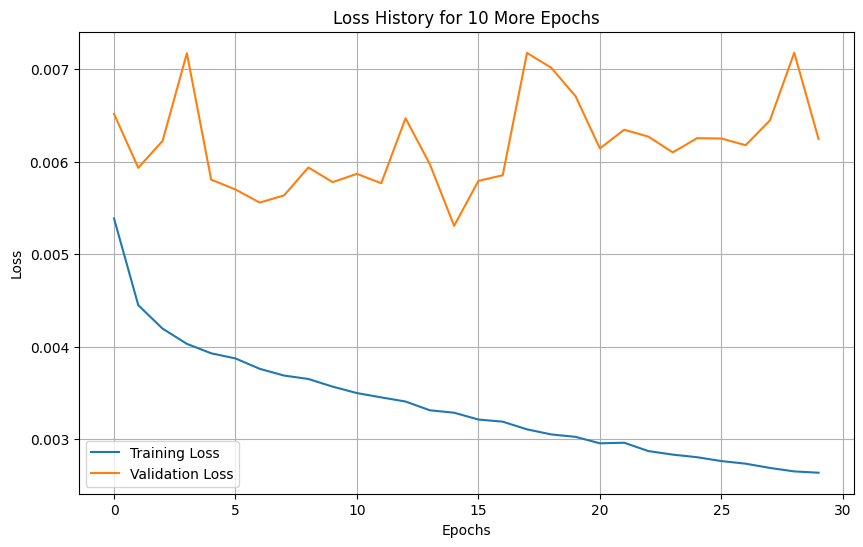

Experiment 4 RMSE: 78.5629994026181


In [ ]:
# Experiment 5: 64 units
exp3_rmse = run_experiment(n_units=64, epochs=10, batch_size=32, learning_rate=0.001, model_name="10 More Epochs")
print(f"Experiment 5 RMSE: {exp3_rmse}")

--- Starting training for: 128 units ---
Epoch 1/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - lambda: 0.0454 - loss: 0.0028 - val_lambda: 0.0249 - val_loss: 9.0235e-04
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - lambda: 0.0249 - loss: 7.4801e-04 - val_lambda: 0.0235 - val_loss: 7.5512e-04
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - lambda: 0.0223 - loss: 5.8267e-04 - val_lambda: 0.0225 - val_loss: 7.1881e-04
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - lambda: 0.0214 - loss: 5.4673e-04 - val_lambda: 0.0228 - val_loss: 7.3058e-04
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - lambda: 0.0204 - loss: 4.9381e-04 - val_lambda: 0.0239 - val_loss: 7.6376e-04
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - lambda: 0.0211 - loss: 5.6197e-04 - val_lambda: 0.0221 - val_loss: 6.9717e-04
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - lambda: 0.0208 - loss: 5.1949e-04 - val_lambda: 0.0213 - val_loss: 6.8132e-04
Epoch 8/10
767/767 ━━━━━━

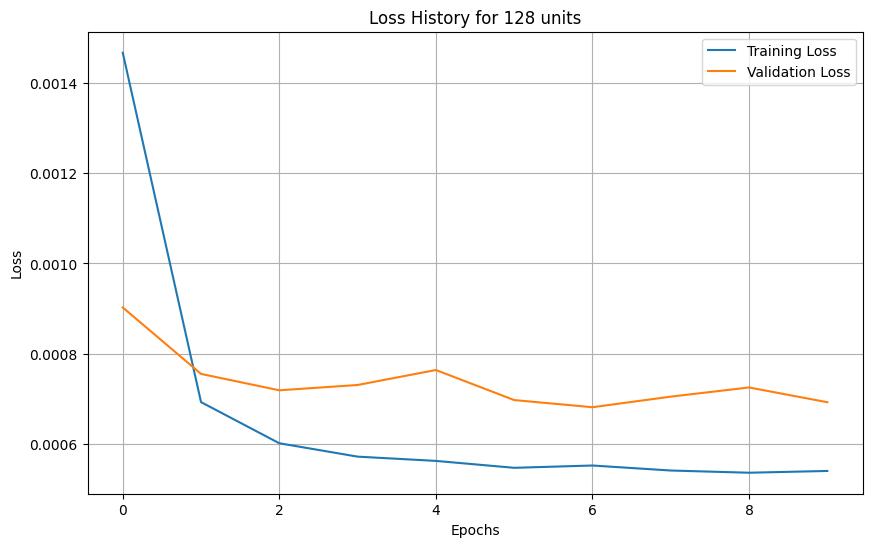

Experiment 6 RMSE: 26.155887509748595


In [ ]:
# Experiment 6: 128 units
exp3_rmse = run_experiment(n_units=128, epochs=10, batch_size=32, learning_rate=0.001, model_name="128 units")
print(f"Experiment 6 RMSE: {exp3_rmse}")

--- Starting training for: 5 Epochs ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - lambda: 0.0438 - loss: 0.0026 - val_lambda: 0.0248 - val_loss: 8.6584e-04
Epoch 2/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - lambda: 0.0239 - loss: 6.9367e-04 - val_lambda: 0.0231 - val_loss: 7.3853e-04
Epoch 3/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - lambda: 0.0216 - loss: 5.4792e-04 - val_lambda: 0.0213 - val_loss: 6.7511e-04
Epoch 4/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - lambda: 0.0222 - loss: 6.0100e-04 - val_lambda: 0.0218 - val_loss: 6.9028e-04
Epoch 5/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - lambda: 0.0216 - loss: 5.7488e-04 - val_lambda: 0.0213 - val_loss: 6.7229e-04
 Finished! Final Validation RMSE for '5 Epochs': 25.772986020990594



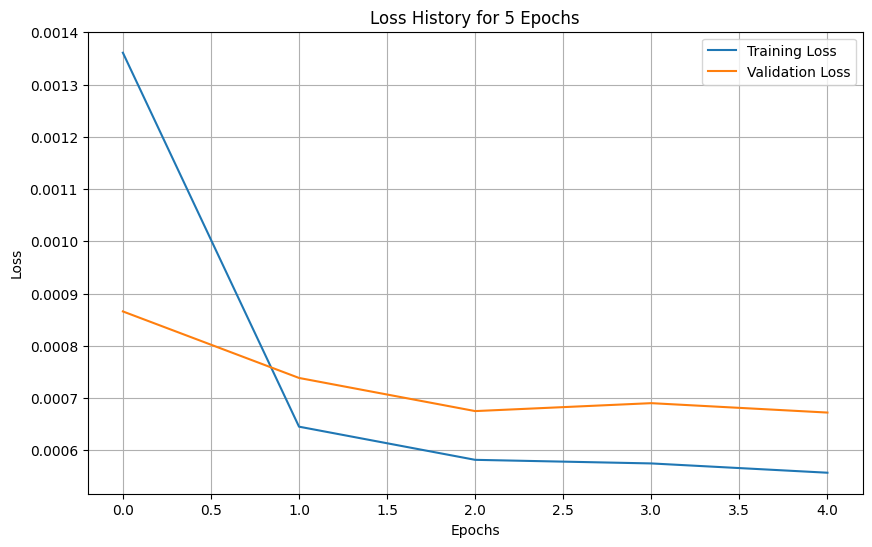

Experiment 6 RMSE: 25.772986020990594


In [ ]:
# Experiment 7: 5 epochs
exp3_rmse = run_experiment(n_units=128, epochs=5, batch_size=32, learning_rate=0.001, model_name="5 Epochs")
print(f"Experiment 6 RMSE: {exp3_rmse}")

--- Starting training for: More batch size ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - lambda: 0.0444 - loss: 0.0023 - val_lambda: 0.0295 - val_loss: 0.0011
Epoch 2/5
384/384 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - lambda: 0.0275 - loss: 8.6216e-04 - val_lambda: 0.0246 - val_loss: 7.7502e-04
Epoch 3/5
384/384 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - lambda: 0.0235 - loss: 6.1972e-04 - val_lambda: 0.0232 - val_loss: 6.9691e-04
Epoch 4/5
384/384 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - lambda: 0.0229 - loss: 6.4498e-04 - val_lambda: 0.0232 - val_loss: 7.0246e-04
Epoch 5/5
384/384 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - lambda: 0.0224 - loss: 6.0113e-04 - val_lambda: 0.0229 - val_loss: 6.9261e-04
 Finished! Final Validation RMSE for 'More batch size': 26.159548911629617



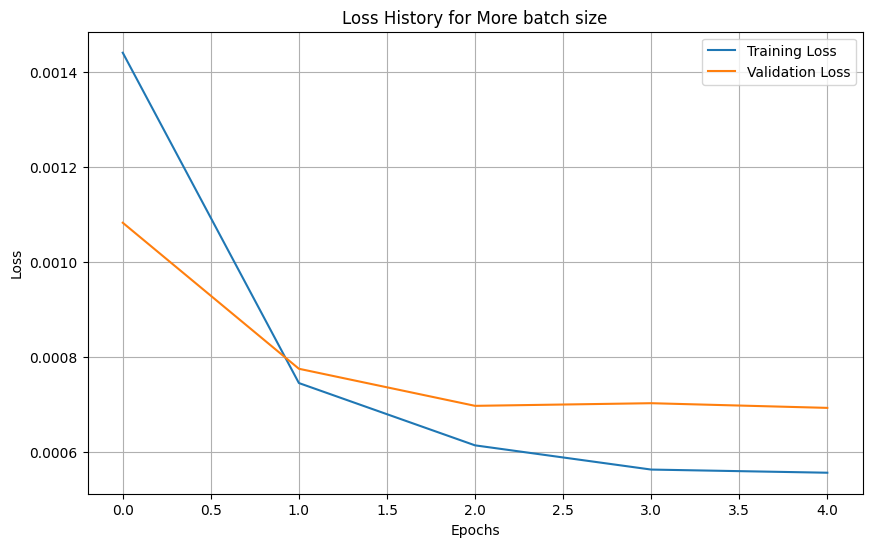

Experiment 8 RMSE: 26.159548911629617


In [ ]:
# Experiment 8: More batch size
exp3_rmse = run_experiment(n_units=128, epochs=10, batch_size=64, learning_rate=0.001, model_name="More batch size")
print(f"Experiment 8 RMSE: {exp3_rmse}")

--- Starting training for: 32 unit and increased learning rate ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 0.0417 - loss: 0.0032 - val_lambda: 0.0244 - val_loss: 7.8652e-04
Epoch 2/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - lambda: 0.0227 - loss: 6.2141e-04 - val_lambda: 0.0224 - val_loss: 7.3180e-04
Epoch 3/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 0.0226 - loss: 6.2020e-04 - val_lambda: 0.0228 - val_loss: 7.6333e-04
Epoch 4/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.0224 - loss: 6.0039e-04 - val_lambda: 0.0258 - val_loss: 8.5779e-04
Epoch 5/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 0.0225 - loss: 6.0313e-04 - val_lambda: 0.0221 - val_loss: 7.3241e-04
 Finished! Final Validation RMSE for '32 unit and increased learning rate': 26.90065357915071



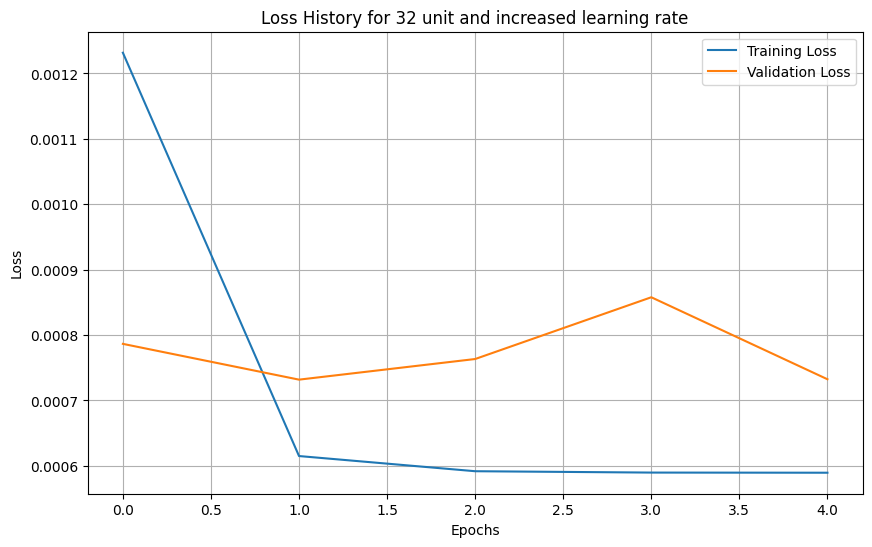

Experiment 9 RMSE: 26.90065357915071


In [ ]:
# Experiment 9: 32 Units and Increased learning rate
exp3_rmse = run_experiment(n_units=32, epochs=10, batch_size=32, learning_rate=0.01, model_name="32 unit and increased learning rate")
print(f"Experiment 9 RMSE: {exp3_rmse}")

--- Starting training for: Reduce learning rate ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 0.1130 - loss: 0.0157 - val_lambda: 0.0604 - val_loss: 0.0048
Epoch 2/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - lambda: 0.0512 - loss: 0.0028 - val_lambda: 0.0442 - val_loss: 0.0027
Epoch 3/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 0.0400 - loss: 0.0017 - val_lambda: 0.0376 - val_loss: 0.0020
Epoch 4/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - lambda: 0.0359 - loss: 0.0014 - val_lambda: 0.0347 - val_loss: 0.0017
Epoch 5/5
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - lambda: 0.0335 - loss: 0.0013 - val_lambda: 0.0316 - val_loss: 0.0015
 Finished! Final Validation RMSE for 'Reduce learning rate': 37.93039155468445



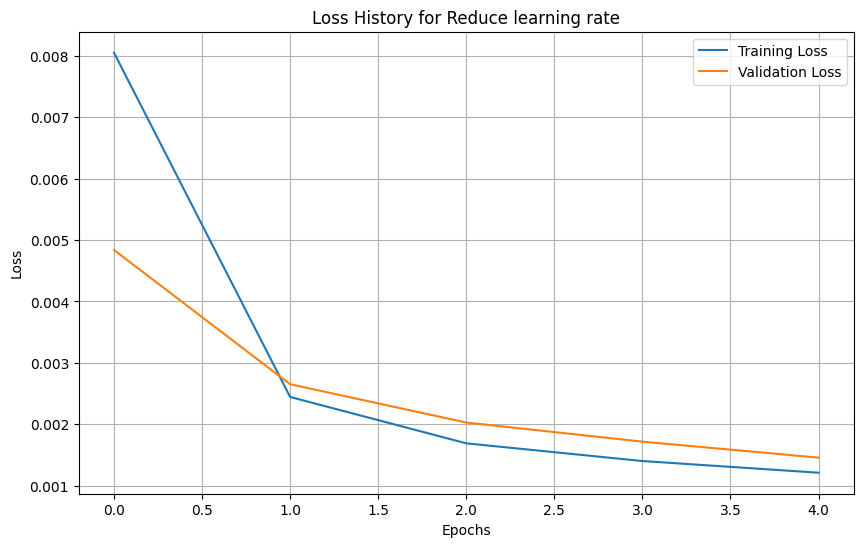

Experiment 10 RMSE: 37.93039155468445


In [ ]:
# Experiment 10: 32 Units and lower learning rate
exp3_rmse = run_experiment(n_units=32, epochs=10, batch_size=32, learning_rate=0.0001, model_name="Reduce learning rate")
print(f"Experiment 10 RMSE: {exp3_rmse}")

--- Starting training for: 124 Units & Reduce learning rate ---
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - lambda: 0.0737 - loss: 0.0070 - val_lambda: 0.0427 - val_loss: 0.0027
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - lambda: 0.0402 - loss: 0.0018 - val_lambda: 0.0370 - val_loss: 0.0019
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - lambda: 0.0341 - loss: 0.0014 - val_lambda: 0.0312 - val_loss: 0.0014
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - lambda: 0.0297 - loss: 9.9385e-04 - val_lambda: 0.0282 - val_loss: 0.0011
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - lambda: 0.0270 - loss: 8.6727e-04 - val_lambda: 0.0268 - val_loss: 0.0010
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - lambda: 0.0251 - loss: 7.1459e-04 - val_lambda: 0.0306 - val_loss: 0.0011
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - lambda: 0.0253 - loss: 7.9128e-04 - val_lambda: 0.0244 - val_loss: 8.5056e-04
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - lambda: 0.0242 - loss: 7.2794e-04 - val_lambda: 0.023

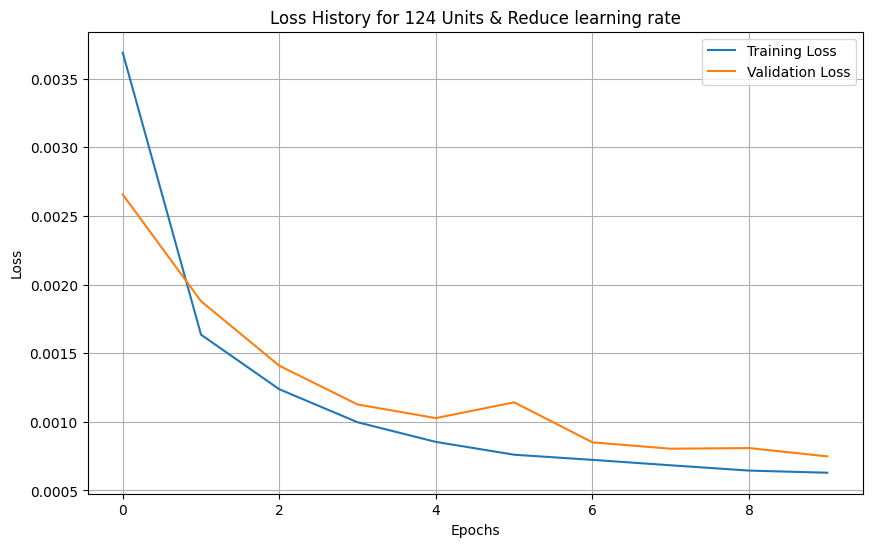

Experiment 11 RMSE: 27.191358775557724


In [ ]:
# Experiment 11: 128 Units and lower learning rate
exp3_rmse = run_experiment(n_units=128, epochs=10, batch_size=32, learning_rate=0.0001, model_name="124 Units & Reduce learning rate")
print(f"Experiment 11 RMSE: {exp3_rmse}")

--- Starting training for: 32 Units & Reduce learning rate ---
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - lambda: 0.0710 - loss: 0.0055 - val_lambda: 0.0460 - val_loss: 0.0029
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - lambda: 0.0419 - loss: 0.0019 - val_lambda: 0.0396 - val_loss: 0.0022
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - lambda: 0.0371 - loss: 0.0015 - val_lambda: 0.0357 - val_loss: 0.0018
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - lambda: 0.0343 - loss: 0.0014 - val_lambda: 0.0327 - val_loss: 0.0015
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - lambda: 0.0312 - loss: 0.0011 - val_lambda: 0.0305 - val_loss: 0.0014
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - lambda: 0.0304 - loss: 0.0011 - val_lambda: 0.0291 - val_loss: 0.0012
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - lambda: 0.0276 - loss: 8.7385e-04 - val_lambda: 0.0282 - val_loss: 0.0012
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - lambda: 0.0283 - loss: 9.6605e-04 - val_lambda: 0.0269 - val_loss: 0.0011
Epoch

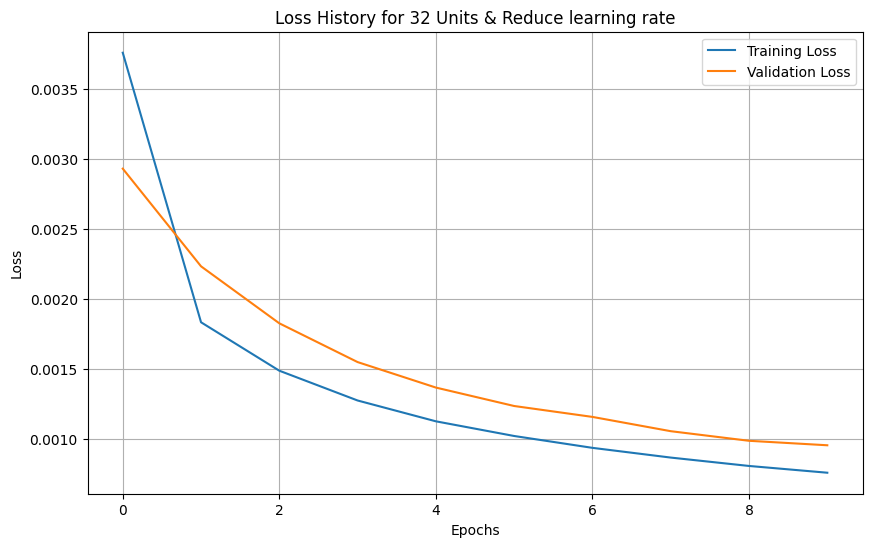

Experiment 12 RMSE: 30.72223185137751


In [63]:
# Experiment 12: 32 Units and lower learning rate
exp3_rmse = run_experiment(n_units=32, epochs=10, batch_size=32, learning_rate=0.0001, model_name="32 Units & Reduce learning rate")
print(f"Experiment 12 RMSE: {exp3_rmse}")

--- Starting training for: 32 Units & 3 epochs ---
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - lambda: 0.0808 - loss: 0.0075 - val_lambda: 0.0430 - val_loss: 0.0026
Epoch 2/3
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - lambda: 0.0396 - loss: 0.0017 - val_lambda: 0.0369 - val_loss: 0.0019
Epoch 3/3
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - lambda: 0.0346 - loss: 0.0013 - val_lambda: 0.0333 - val_loss: 0.0016
 Finished! Final Validation RMSE for '32 Units & 3 epochs': 39.44736676968486



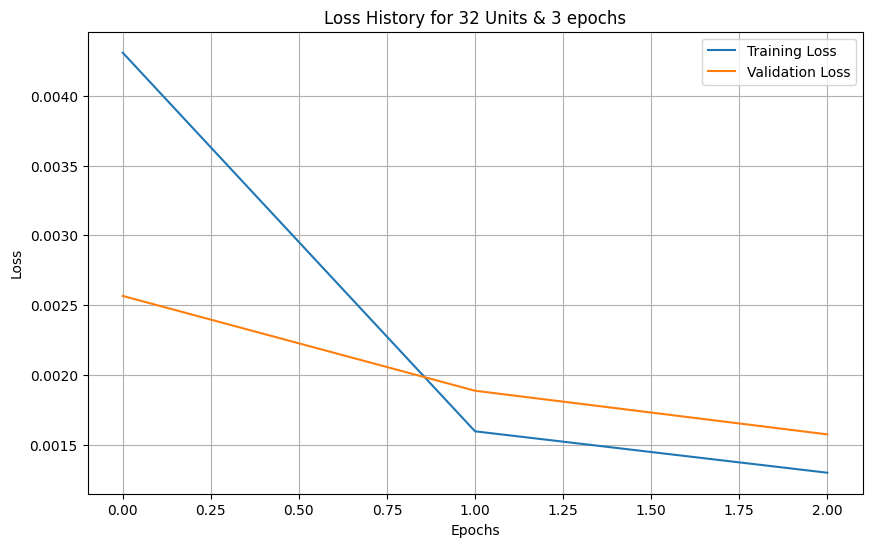

Experiment 13 RMSE: 39.44736676968486


In [75]:
# Experiment 13: 32 Units and 3 epochs
exp3_rmse = run_experiment(n_units=32, epochs=3, batch_size=32, learning_rate=0.0001, model_name="32 Units & 3 epochs")
print(f"Experiment 13 RMSE: {exp3_rmse}")

--- Starting training for: 32 Units & Reduce learning rate ---
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - lambda: 0.1320 - loss: 0.0211 - val_lambda: 0.0614 - val_loss: 0.0054
Epoch 2/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - lambda: 0.0558 - loss: 0.0033 - val_lambda: 0.0461 - val_loss: 0.0030
Epoch 3/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - lambda: 0.0429 - loss: 0.0020 - val_lambda: 0.0410 - val_loss: 0.0023
Epoch 4/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - lambda: 0.0388 - loss: 0.0017 - val_lambda: 0.0387 - val_loss: 0.0020
Epoch 5/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - lambda: 0.0361 - loss: 0.0015 - val_lambda: 0.0358 - val_loss: 0.0018
Epoch 6/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - lambda: 0.0338 - loss: 0.0012 - val_lambda: 0.0344 - val_loss: 0.0016
Epoch 7/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - lambda: 0.0332 - loss: 0.0012 - val_lambda: 0.0332 - val_loss: 0.0015
Epoch 8/15
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - lambda: 0.0319 - loss: 0.0012 - val_lambda: 0.0312 - val_loss: 0.0014
Epoch 9/15
76

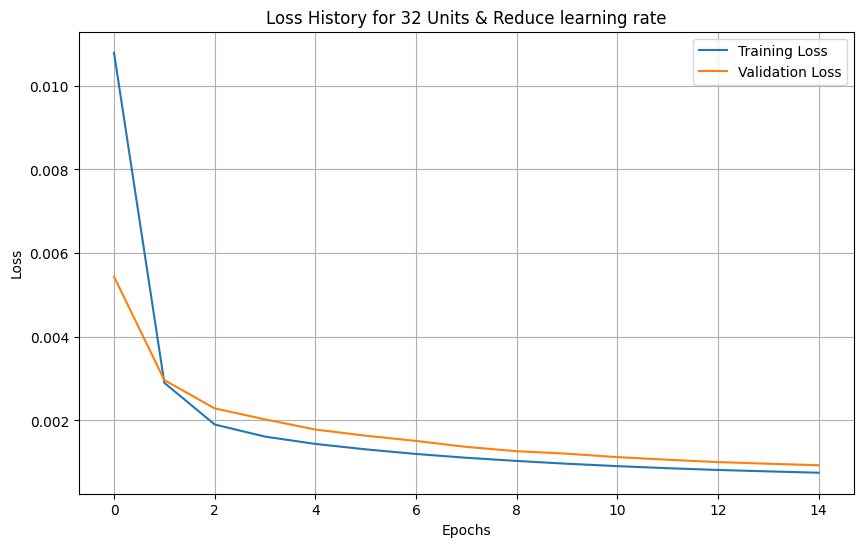

Experiment 14 RMSE: 30.308295396471298


In [76]:
# Experiment 14: 16 Units,
exp3_rmse = run_experiment(n_units=16, epochs=15, batch_size=32, learning_rate=0.0001, model_name="32 Units & Reduce learning rate")
print(f"Experiment 14 RMSE: {exp3_rmse}")

--- Starting training for: 16 Units & Reduce learning rate ---
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - lambda: 0.1487 - loss: 0.0252 - val_lambda: 0.0681 - val_loss: 0.0066
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - lambda: 0.0596 - loss: 0.0038 - val_lambda: 0.0510 - val_loss: 0.0035
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - lambda: 0.0461 - loss: 0.0023 - val_lambda: 0.0442 - val_loss: 0.0027
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - lambda: 0.0410 - loss: 0.0018 - val_lambda: 0.0401 - val_loss: 0.0023
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - lambda: 0.0379 - loss: 0.0016 - val_lambda: 0.0378 - val_loss: 0.0020
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - lambda: 0.0349 - loss: 0.0014 - val_lambda: 0.0352 - val_loss: 0.0017
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - lambda: 0.0322 - loss: 0.0011 - val_lambda: 0.0330 - val_loss: 0.0015
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - lambda: 0.0316 - loss: 0.0012 - val_lambda: 0.0310 - val_loss: 0.0014
Epoch 9/10
76

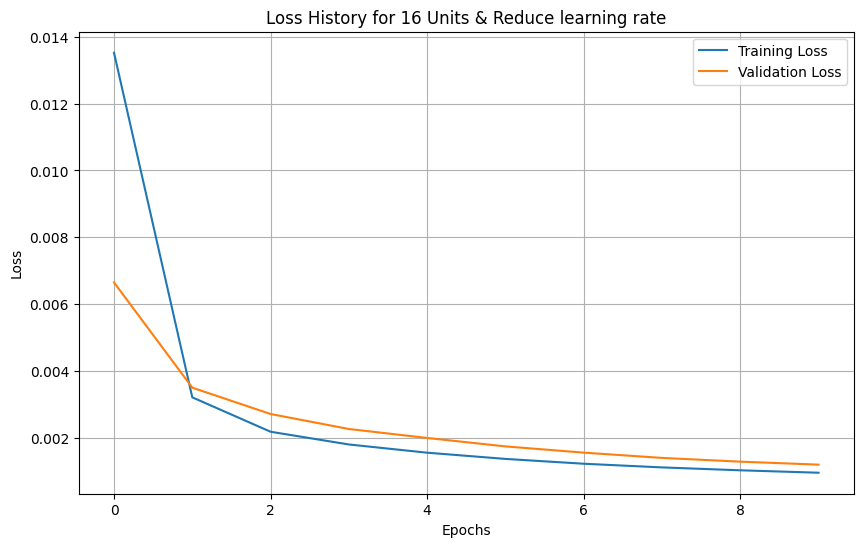

Experiment 12 RMSE: 34.280297662490554


In [77]:
# Experiment 15: 16 Units and lower learning rate
exp3_rmse = run_experiment(n_units=16, epochs=10, batch_size=32, learning_rate=0.0001, model_name="16 Units & Reduce learning rate")
print(f"Experiment 15 RMSE: {exp3_rmse}")

#Best model compilation

In [134]:
# Define the file path to save the best model
model_path = '/content/drive/MyDrive/air_quality_forcasting/best_model.keras'

# Define the final LSTM model architecture (using your best single-layer version)

model = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(64), # Your optimal single-layer model
    Dropout(0.2), # With dropout
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the final model
print("--- Training the final model for submission ---")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=10, # Use more epochs, EarlyStopping will handle stopping
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),

    verbose=1
)
print("--- Final model training complete ---")

--- Training the final model for submission ---
Epoch 1/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0012 - val_loss: 8.9721e-04
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 8.3028e-04 - val_loss: 7.9858e-04
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 6.5950e-04 - val_loss: 7.3534e-04
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 6.3263e-04 - val_loss: 6.9002e-04
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 6.9747e-04 - val_loss: 6.7241e-04
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 6.5510e-04 - val_loss: 7.0538e-04
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 6.4293e-04 - val_loss: 6.8269e-04
Epoch 9/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 5.7724e-04 - val_loss: 6.8777e-04
Epoch 10/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 5.7945e-04 - val_loss: 7.7809e-04
---

In [151]:
X_test_raw = test.drop(['No', 'datetime'], axis=1)

# Correctly scale the test features using the scaler fitted on the training data
X_test_scaled = scaler_X.transform(X_test_raw)

# Get the last sequence from the training data for the first prediction
last_train_sequence = scaled_data[-n_steps_in:]
current_sequence = last_train_sequence

# List to store scaled predictions
test_predictions_scaled = []

# Loop through each time step in the test data
for i in range(len(X_test_scaled)):
    # Reshape the current sequence for prediction (add batch dimension)
    input_seq = current_sequence[np.newaxis, :, :]

    # Predict the next step
    predicted_scaled = best_model.predict(input_seq, verbose=0)

    # Store the scaled prediction
    test_predictions_scaled.append(predicted_scaled)

    # Prepare the next sequence: shift the window and add the new feature data and prediction
    # Combine the new features with the predicted value
    next_features = X_test_scaled[i]
    next_step = np.hstack((next_features, predicted_scaled))

    # Update the current sequence by dropping the oldest value and adding the newest
    current_sequence = np.vstack((current_sequence[1:], next_step))

# Inverse transform the scaled predictions to get the final result
predictions = scaler_y.inverse_transform(np.array(test_predictions_scaled).reshape(-1, 1))
predictions = np.nan_to_num(predictions)
predictions = np.round(predictions).astype(int)

# Ensure 'datetime' in test_df is treated as a datetime object
test['datetime'] = pd.to_datetime(test['datetime'])

# Prepare the submission DataFrame
# Use the correct format with %-H to remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': test['datetime'].dt.strftime('%Y-%m-%d %-H:%M:%S'),
    'pm2.5': predictions.flatten()
})

# Save the file in CSV format
submission_path = '/content/drive/MyDrive/air_quality_forcasting/submission.csv'
submission.to_csv(submission_path, index=False)

print(f"Submission file created successfully at: {submission_path}")


NameError: name 'best_model' is not defined